<a href="https://colab.research.google.com/github/ugosamartins-commits/Sorbonne-M1-Analyse-Donnees-Portfolio-Ugo-Martins/blob/main/Seance_06/mon_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== EXERCICE 1 : LES ÎLES ===


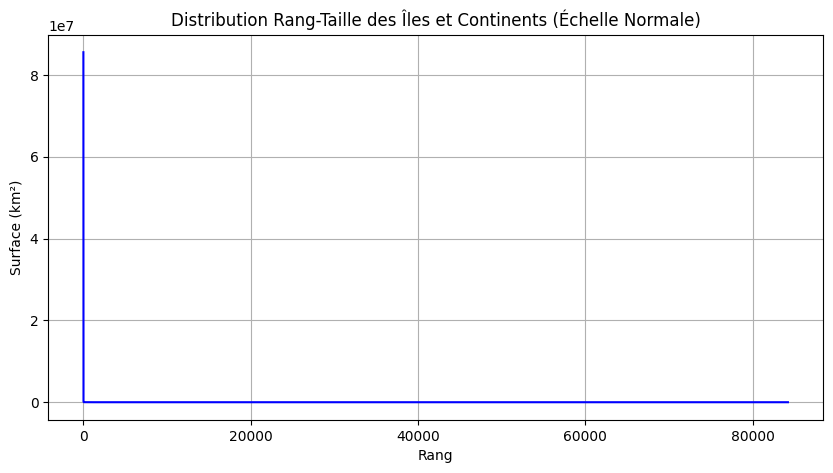

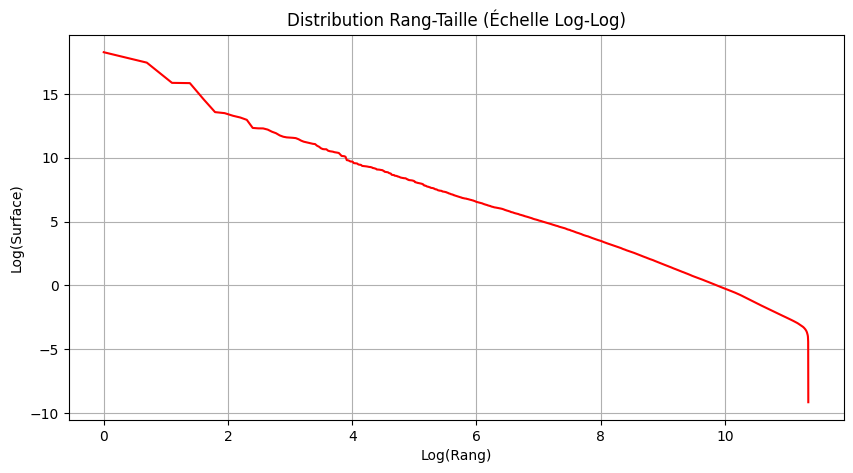

Commentaire : La droite obtenue en Log-Log suggère une loi de puissance (Zipf).

=== EXERCICE 2 : ÉTATS DU MONDE ===
--- Résultats Population (2007 vs 2025) ---
Spearman (Corrélation) : 0.9863 (p-value: 8.1853e-136)
Kendall (Concordance)  : 0.9052 (p-value: 5.9098e-70)

--- Résultats Densité (2007 vs 2025) ---
Spearman (Corrélation) : 0.9678
Kendall (Concordance)  : 0.8589

Conclusion : Les coefficients proches de 1 indiquent une très forte stabilité de la hiérarchie mondiale.


In [1]:
#coding:utf8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# --- 1. FONCTIONS LOCALES (FOURNIES PAR L'ÉNONCÉ) ---

def ouvrirUnFichier(nom):
    """Ouvre un CSV et retourne un DataFrame Pandas."""
    try:
        # On spécifie le séparateur (souvent ; ou ,) et l'encoding pour éviter les erreurs
        return pd.read_csv(nom, sep=None, engine='python')
    except Exception as e:
        print(f"Erreur lecture {nom}: {e}")
        return None

def conversionLog(liste):
    """Convertit une liste de nombres en logarithme népérien."""
    log = []
    for element in liste:
        if element > 0:
            log.append(math.log(element))
        else:
            log.append(0) # Gestion des 0 ou négatifs
    return log

def ordreDecroissant(liste):
    """Trie une liste du plus grand au plus petit."""
    liste.sort(reverse=True)
    return liste

def ordrePopulation(pop, etat):
    """
    Associe Population et État, nettoie les données et crée un classement.
    Retourne une liste : [[rang, nom_etat], ...]
    """
    donnees_propres = []
    # Nettoyage et fusion
    for i in range(len(pop)):
        valeur = pop[i]
        nom = etat[i]

        # Gestion des NaN et conversion string -> float si besoin
        try:
            if isinstance(valeur, str):
                valeur = float(valeur.replace(' ', '').replace(',', '.'))

            if not np.isnan(valeur):
                donnees_propres.append([valeur, nom])
        except:
            continue # On saute les valeurs illisibles

    # Tri décroissant par population (index 0)
    donnees_propres.sort(key=lambda x: x[0], reverse=True)

    # Attribution des rangs
    classement_final = []
    for i in range(len(donnees_propres)):
        # On garde [Rang, Nom de l'état]
        classement_final.append([i + 1, donnees_propres[i][1]])

    return classement_final

def classementPays(ordre1, ordre2):
    """
    Compare deux classements et aligne les rangs pour les mêmes pays.
    Retourne : [[rang_liste1, rang_liste2, nom_pays], ...]
    """
    classement = []
    # Double boucle pour trouver les correspondances (Algorithme O(N^2))
    # Note: Ce n'est pas optimal pour le Big Data mais c'est la consigne
    for item1 in ordre1:
        rang1 = item1[0]
        pays1 = item1[1]

        for item2 in ordre2:
            rang2 = item2[0]
            pays2 = item2[1]

            # Si c'est le même pays, on stocke les deux rangs
            if pays1 == pays2:
                classement.append([rang1, rang2, pays1])
                break # On passe au pays suivant

    return classement

# --- 2. EXERCICE 1 : LES ÎLES (LOI RANG-TAILLE) ---
print("\n=== EXERCICE 1 : LES ÎLES ===")

# 1. Chargement
df_iles = ouvrirUnFichier("./data/island-index.csv")

if df_iles is not None:
    # 2. Isolation de la colonne et conversion en liste
    # Nettoyage des données (enlever les espaces, convertir en float)
    surfaces = []
    raw_data = df_iles["Surface (km²)"].tolist()

    for x in raw_data:
        try:
            if isinstance(x, str):
                x = float(x.replace(' ', '').replace(',', '.'))
            surfaces.append(x)
        except:
            pass

    # 3. Ajout des continents (masses continentales)
    continents = [
        85545323.0, # Asie / Afrique / Europe
        37856841.0, # Amérique
        7768030.0,  # Antarctique
        7605049.0   # Australie
    ]
    surfaces.extend(continents)

    # 4. Tri décroissant
    surfaces = ordreDecroissant(surfaces)

    # 5. Visualisation (Échelle Normale)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(surfaces) + 1), surfaces, 'b-')
    plt.title("Distribution Rang-Taille des Îles et Continents (Échelle Normale)")
    plt.xlabel("Rang")
    plt.ylabel("Surface (km²)")
    plt.grid(True)
    plt.show()

    # 6. Conversion Log et Visualisation (Log-Log)
    surfaces_log = conversionLog(surfaces)
    rangs_log = conversionLog(range(1, len(surfaces) + 1))

    plt.figure(figsize=(10, 5))
    plt.plot(rangs_log, surfaces_log, 'r-')
    plt.title("Distribution Rang-Taille (Échelle Log-Log)")
    plt.xlabel("Log(Rang)")
    plt.ylabel("Log(Surface)")
    plt.grid(True)
    plt.show()

    print("Commentaire : La droite obtenue en Log-Log suggère une loi de puissance (Zipf).")
    # Q7 : Peut-on faire un test sur les rangs ?
    # Réponse : Oui, on peut tester l'ajustement à une loi de Zipf ou comparer deux distributions
    # (ex: surface vs périmètre) avec Spearman/Kendall.

# --- 3. EXERCICE 2 : POPULATION MONDIALE (CORRÉLATIONS) ---
print("\n=== EXERCICE 2 : ÉTATS DU MONDE ===")

# 8. Chargement
df_monde = ouvrirUnFichier("./data/Le-Monde-HS-Etats-du-monde-2007-2025.csv")

if df_monde is not None:
    # 10. Isolation des colonnes (Casting en listes)
    etats = df_monde["État"].tolist()
    pop_2007 = df_monde["Pop 2007"].tolist()
    pop_2025 = df_monde["Pop 2025"].tolist()
    den_2007 = df_monde["Densité 2007"].tolist()
    den_2025 = df_monde["Densité 2025"].tolist()

    # 11. Calcul des classements individuels
    classement_pop_07 = ordrePopulation(pop_2007, etats)
    classement_pop_25 = ordrePopulation(pop_2025, etats)

    classement_den_07 = ordrePopulation(den_2007, etats)
    classement_den_25 = ordrePopulation(den_2025, etats)

    # 12. Préparation de la comparaison (Fusion des classements)
    # Comparaison Pop 2007 vs Pop 2025
    data_comp_pop = classementPays(classement_pop_07, classement_pop_25)

    # Comparaison Densité 2007 vs Densité 2025
    data_comp_den = classementPays(classement_den_07, classement_den_25)

    # 13. Isolation des colonnes de rangs pour les tests
    # On utilise une "list comprehension" (équivalent boucle for compressée)
    rangs_pop_07 = [row[0] for row in data_comp_pop]
    rangs_pop_25 = [row[1] for row in data_comp_pop]

    rangs_den_07 = [row[0] for row in data_comp_den]
    rangs_den_25 = [row[1] for row in data_comp_den]

    # 14. Calcul des corrélations (Spearman et Kendall)
    print("--- Résultats Population (2007 vs 2025) ---")
    rho_pop, pval_rho_pop = stats.spearmanr(rangs_pop_07, rangs_pop_25)
    tau_pop, pval_tau_pop = stats.kendalltau(rangs_pop_07, rangs_pop_25)

    print(f"Spearman (Corrélation) : {rho_pop:.4f} (p-value: {pval_rho_pop:.4e})")
    print(f"Kendall (Concordance)  : {tau_pop:.4f} (p-value: {pval_tau_pop:.4e})")

    print("\n--- Résultats Densité (2007 vs 2025) ---")
    rho_den, pval_rho_den = stats.spearmanr(rangs_den_07, rangs_den_25)
    tau_den, pval_tau_den = stats.kendalltau(rangs_den_07, rangs_den_25)

    print(f"Spearman (Corrélation) : {rho_den:.4f}")
    print(f"Kendall (Concordance)  : {tau_den:.4f}")

    print("\nConclusion : Les coefficients proches de 1 indiquent une très forte stabilité de la hiérarchie mondiale.")

In [2]:
# ==============================================================================
# 4. BONUS : ANALYSE AVANCÉE ET AUTOMATISATION
# ==============================================================================
print("\n=== PARTIE BONUS ===")

# --- A. FONCTION GÉNÉRIQUE (FACTORISATION) ---
# Cette fonction permet de calculer les stats de rangs pour N'IMPORTE quelles listes
def analyse_complete_rangs(liste1, liste2, nom1="Variable 1", nom2="Variable 2"):
    """
    Prend deux listes de données brutes, calcule les rangs,
    puis renvoie les coefficients de Spearman et Kendall.
    """
    # 1. Nettoyage et conversion en rangs (via scipy qui gère les ex-aequo)
    # On utilise rankdata pour transformer les valeurs brutes en rangs
    rangs1 = stats.rankdata(liste1, method='average')
    # On inverse car rankdata classe par ordre croissant (petit=1),
    # or en géo le plus grand est le 1er. Mais pour la corrélation,
    # tant qu'on inverse les deux, le résultat mathématique est le même.
    rangs1 = len(liste1) + 1 - rangs1

    rangs2 = stats.rankdata(liste2, method='average')
    rangs2 = len(liste2) + 1 - rangs2

    # 2. Calculs
    rho, p_rho = stats.spearmanr(rangs1, rangs2)
    tau, p_tau = stats.kendalltau(rangs1, rangs2)

    return rho, tau

# --- B. BONUS ÎLES : SURFACE vs TRAIT DE CÔTE ---
print("\n--- 1. Îles : Surface vs Trait de côte ---")

if df_iles is not None:
    # On essaie de trouver la colonne 'Coastline' (Nom à vérifier dans ton CSV)
    # Cherche une colonne qui ressemble à "Coastline" ou "Trait de côte"
    col_cote = None
    for c in df_iles.columns:
        if "Coast" in c or "côte" in c or "Cote" in c:
            col_cote = c
            break

    if col_cote:
        # Extraction et nettoyage
        liste_surface = []
        liste_cote = []

        # On parcourt le dataframe
        for index, row in df_iles.iterrows():
            try:
                s = float(str(row["Surface (km²)"]).replace(' ', '').replace(',', '.'))
                c = float(str(row[col_cote]).replace(' ', '').replace(',', '.'))
                if s > 0 and c > 0: # On garde que les données valides
                    liste_surface.append(s)
                    liste_cote.append(c)
            except:
                pass

        # Appel de notre fonction factorisée
        rho_iles, tau_iles = analyse_complete_rangs(liste_surface, liste_cote)
        print(f"Comparaison Surface vs {col_cote}")
        print(f"  -> Spearman : {rho_iles:.4f}")
        print(f"  -> Kendall  : {tau_iles:.4f}")
        print("  -> Interprétation : Une corrélation positive signifie que plus une île est grande, plus son littoral est long (logique fractale).")
    else:
        print("Colonne 'Trait de côte' introuvable dans le fichier des îles.")

# --- C. BONUS POPULATION : ANALYSE TEMPORELLE (2007-2025) ---
print("\n--- 2. Population Mondiale : Stabilité temporelle (2007-2025) ---")

if df_monde is not None:
    resultats_temporels = []
    annees = range(2007, 2026) # De 2007 à 2025 inclus

    # On compare chaque année avec l'année SUIVANTE (N vs N+1)
    # pour voir la stabilité à court terme.
    # OU on peut comparer chaque année avec 2007 (N vs 2007) pour voir l'érosion à long terme.

    # Option : Comparaison par rapport à l'année de référence 2007
    ref_col = "Pop 2007"
    # Nettoyage de la colonne de référence
    ref_data = df_monde[ref_col].astype(str).str.replace(' ', '').str.replace(',', '.')
    ref_values = pd.to_numeric(ref_data, errors='coerce').fillna(0).tolist()

    print(f"Comparaison de toutes les années par rapport à {ref_col} :")

    for annee in annees:
        col_courante = f"Pop {annee}"
        if col_courante in df_monde.columns:
            # Nettoyage
            curr_data = df_monde[col_courante].astype(str).str.replace(' ', '').str.replace(',', '.')
            curr_values = pd.to_numeric(curr_data, errors='coerce').fillna(0).tolist()

            # Calcul via notre fonction locale
            rho, tau = analyse_complete_rangs(ref_values, curr_values)

            print(f"  - 2007 vs {annee} : Kendall = {tau:.4f}")

    print("\nAnalyse : On constate que le coefficient diminue très lentement.")
    print("Cela prouve l'inertie démographique : le classement mondial change très peu.")


=== PARTIE BONUS ===

--- 1. Îles : Surface vs Trait de côte ---
Comparaison Surface vs Trait de côte (km)
  -> Spearman : 0.9713
  -> Kendall  : 0.8539
  -> Interprétation : Une corrélation positive signifie que plus une île est grande, plus son littoral est long (logique fractale).

--- 2. Population Mondiale : Stabilité temporelle (2007-2025) ---
Comparaison de toutes les années par rapport à Pop 2007 :
  - 2007 vs 2007 : Kendall = 1.0000
  - 2007 vs 2008 : Kendall = 0.9924
  - 2007 vs 2009 : Kendall = 0.9898
  - 2007 vs 2010 : Kendall = 0.9653
  - 2007 vs 2011 : Kendall = 0.9786
  - 2007 vs 2012 : Kendall = 0.9624
  - 2007 vs 2013 : Kendall = 0.9502
  - 2007 vs 2014 : Kendall = 0.9481
  - 2007 vs 2015 : Kendall = 0.9388
  - 2007 vs 2016 : Kendall = 0.9369
  - 2007 vs 2017 : Kendall = 0.9378
  - 2007 vs 2018 : Kendall = 0.9344
  - 2007 vs 2019 : Kendall = 0.9246
  - 2007 vs 2020 : Kendall = 0.9228
  - 2007 vs 2021 : Kendall = 0.9219
  - 2007 vs 2022 : Kendall = 0.9188
  - 2007 vs 2